<a href="https://colab.research.google.com/github/Deepakj98-98/Decision_Tree/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv("/content/heart_v2.csv")

In [ ]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [ ]:
x=df.drop("heart disease", axis=1)

In [ ]:
y=df["heart disease"]

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((216, 4), (54, 4), (216,), (54,))

In [ ]:
decision_tree= DecisionTreeClassifier(criterion="entropy",max_depth=4, random_state=42)

In [ ]:
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

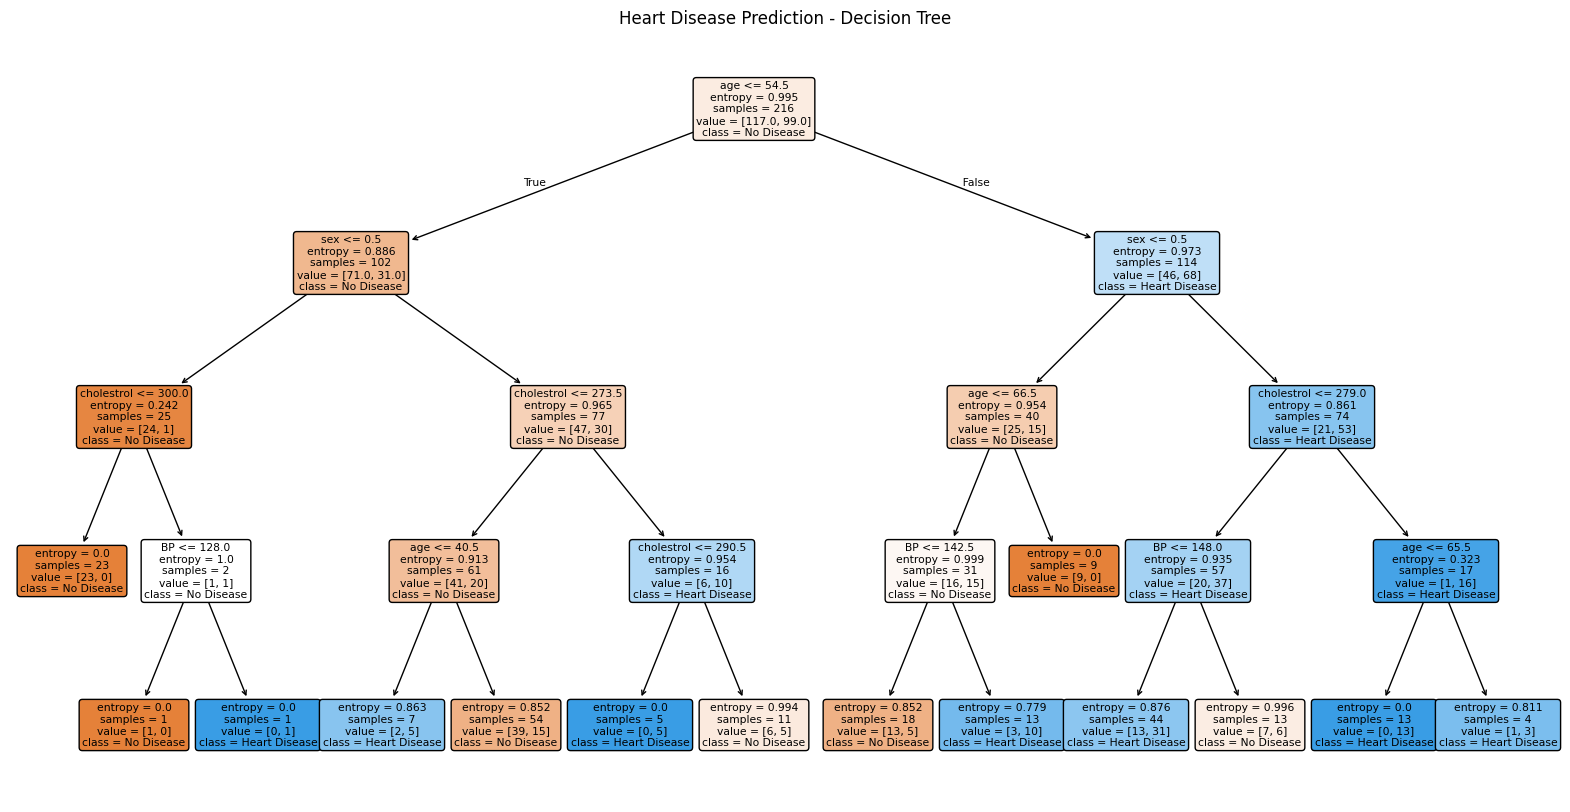

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(decision_tree,feature_names=x.columns, class_names=["No Disease","Heart Disease"], filled=True, rounded=True)
plt.title("Heart Disease Prediction - Decision Tree")
plt.show()

<h1>Explanation of the Decision Tree</h1>

---

Here the root node is age the splitting condition is **age<=54** <br>
If true go left if false go right <br>
The values [117, 99] represent ["No Disease", "Heart Disease"] hence predicted class is "No Disease" <br>
Next split is by sex, condition **sex<=0.5** <br>

When number of **"No Disease"** value is greater than **"Heart Disease"** then the predicted class is No disease and the darker the colour of class stronger the prediction similarly when **"Heart Disease"** value is greater than **"No disease"** predicted class is **"Heart Disease"**

In [ ]:
y_pred=decision_tree.predict(x_test)

print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
print(f"Classification report")
print(classification_report(y_test, y_pred, target_names=["No Disease","Heart Disease"]))

Accuracy score: 0.6111111111111112
Classification report
               precision    recall  f1-score   support

   No Disease       0.70      0.64      0.67        33
Heart Disease       0.50      0.57      0.53        21

     accuracy                           0.61        54
    macro avg       0.60      0.60      0.60        54
 weighted avg       0.62      0.61      0.61        54



<h1>Plotting the importance of the features considered for decision tree

In [ ]:
important_features=decision_tree.feature_importances_
feature_names=x.columns

In [ ]:
print(important_features)
print(feature_names)

[0.37188888 0.26642833 0.12988029 0.23180249]
Index(['age', 'sex', 'BP', 'cholestrol'], dtype='object')


In [ ]:
index=np.argsort(important_features)[::-1]
print(index)

[0 1 3 2]


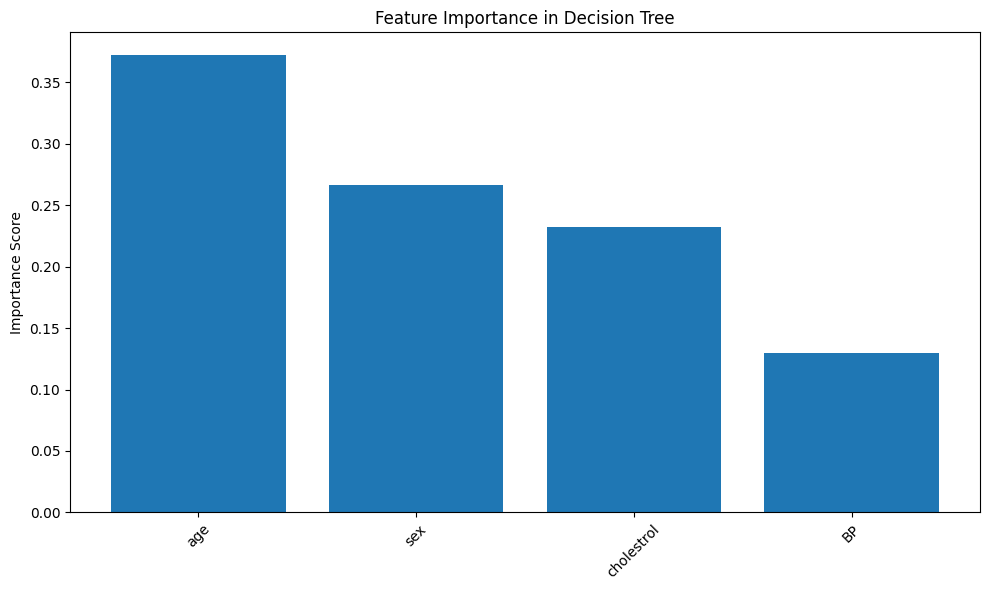

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Feature Importance in Decision Tree")
plt.bar(range(len(important_features)), important_features[index], align="center")
plt.xticks(range(len(important_features)), feature_names[index], rotation=45)
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()